In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split

CRISP-DM lifecycle:
1. Business Understanding:
• Understand the project's objectives and business goals, and define the problem you aim
to solve with data mining.
2. Data Understanding:
• Gather and explore data to gain insights into its quality, structure, and relevance to the
problem. This step often involves data collection, data profiling, and initial data analysis.
3. Data Preparation:
• Preprocess and clean the data to make it suitable for modeling. Tasks include handling
missing values, dealing with outliers, and transforming variables.
4. Modelling:
• Select and apply appropriate data mining and machine learning techniques to build and evaluate
models. This step includes selecting algorithms, and training models, and assessing their
performance.
5. Evaluation:
• Assess the quality and effectiveness of the models developed in the previous step. This involves
metrics, cross-validation, and comparing model performance against the project's goals.
6. Deployment:
• Deploy the selected model(s) into the production environment for real-world use. This step may
involve integrating the model into business processes and monitoring its performance over time.


# Data Mining: CA2
by Peter and Jonas Wortmann
## 1. Data understanding and Preparation
Sentiment Analysis (SA) is a sub field of text mining and is used to extract the opinions, sentiments and subjectivity of text [[1]](#1). This assignment aims to classify the sentiment of user reviews based on their text features.

<a id="1">[1]</a> 
Walaa Medhat, Ahmed Hassan, Hoda Korashy,
Sentiment analysis algorithms and applications: A survey,
Ain Shams Engineering Journal,
Volume 5, Issue 4,
2014,
Pages 1093-1113,
ISSN 2090-4479,
https://doi.org/10.1016/j.asej.2014.04.011.
(https://www.sciencedirect.com/science/article/pii/S2090447914000550)

In [64]:
user_reviews = pd.read_csv("amazon.csv")
with open("StopWords.txt", "r") as f:
    stopwords = f.read().splitlines() 
user_reviews.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [65]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


<Axes: xlabel='Positive'>

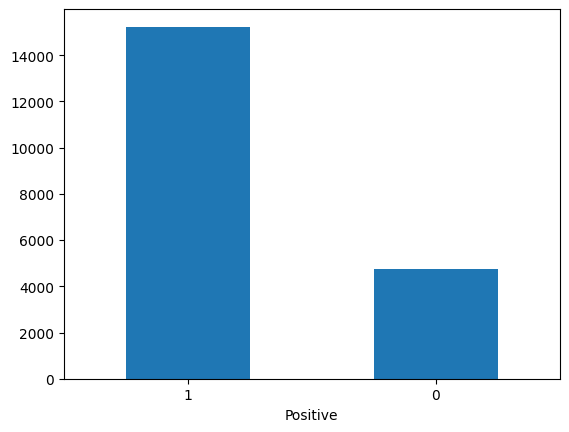

In [66]:
user_reviews.Positive.value_counts().plot(kind="bar", rot=0)

The dataset contains 20,000 rows. Each row consists of a user review and it's corresponding sentiments. The labels are encoded as integers, 1 = positive and 0 = negative. The dataset has unbalanced classes as you can see in the plot above.

### Data quality

In [67]:
user_reviews.iloc[0].reviewText

'This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff'

In [68]:
user_reviews.iloc[11].reviewText

'this. is fun an time consuming. works great on my kindle fire I really like this game so does my btother'

The reviews contain spelling mistakes, for example "btother", "realustic" and "acording" as you can see in the texts above.

### Cleaning
[[2]](#2) compare punctuation removal in sentiment analysis scenarios of english and turkish reviews and come to the conclusion to keep punctuation and stopwords because they contain meaningful information in terms of their sentiment. [[3]](#3) also identifies punctuation as a good feature for Twitter sentiment analysis. Therefore, this assignment experiments with stopwords und punctuation removal and creates the following four feature sets:
1. Stopwords removed (SR)
2. Punctuation removed (PR)
3. Stopwords and punctuation removed (SR & PR)
4. Stopwords and punctuation kept

<a id="2">[2]</a> Parlar, Tuba & Özel, Selma & Song, Fei. (2019). Analysis of data pre-processing methods for the sentiment analysis of reviews. Computer Science. 20. 123. 10.7494/csci.2019.20.1.3097. 
<a id="3">[3]</a>  Koto, F., Adriani, M. (2015). A Comparative Study on Twitter Sentiment Analysis: Which Features are Good?. In: Biemann, C., Handschuh, S., Freitas, A., Meziane, F., Métais, E. (eds) Natural Language Processing and Information Systems. NLDB 2015. Lecture Notes in Computer Science(), vol 9103. Springer, Cham. https://doi.org/10.1007/978-3-319-19581-0_46

In [69]:
nlp = spacy.load("en_core_web_sm")

def tokenize(text: str, remove_punct=False):
    doc = nlp(text)
    tokens = [token.text for token in doc] if not remove_punct else [token.text for token in doc if not token.is_punct]
    return tokens

def remove_stopwords(tokens:list, stopword_list:list):
    tokens = set(tokens)
    stopwords = set(stopword_list)
    tokens.difference_update(stopwords)
    return list(tokens)

In [70]:
# lowercase and tokenize
user_reviews["tokens_PR"] = user_reviews.reviewText.str.lower().apply(tokenize, remove_punct=True)
user_reviews["tokens"] = user_reviews.reviewText.str.lower().apply(tokenize, remove_punct=False)
# remove stopwords
user_reviews["tokens_SR"] = user_reviews.tokens.apply(remove_stopwords, stopword_list=stopwords)
user_reviews["tokens_PR_SR"] = user_reviews.tokens_PR.apply(remove_stopwords, stopword_list=stopwords)

user_reviews.head()

In [ ]:
RANDOM_STATE = 1

train_X, train_y, test_X, test_y = train_test_split(X = user_reviews["tokens"], y = user_reviews["Positive"], test_size=0.3)

,reviewText,Positive,tokens,tokens_stopwords_removed
0,This is a one of the best apps acording to a b...,1,"[this, is, a, one, of, the, best, apps, acordi...","[eggs, pigs, apps, bunch, bombs, acording, stu..."
1,This is a pretty good version of the game for ...,1,"[this, is, a, pretty, good, version, of, the, ...","[game, levels, enjoy, play, lots, lot, kids, f..."
2,this is a really cool game. there are a bunch ...,1,"[this, is, a, really, cool, game, there, are, ...","[game, super, eggs, levels, golden, bunch, fun..."
3,"This is a silly game and can be frustrating, b...",1,"[this, is, a, silly, game, and, can, be, frust...","[game, time, lots, frustrating, fun, definitel..."
4,This is a terrific game on any pad. Hrs of fun...,1,"[this, is, a, terrific, game, on, any, pad, hr...","[game, waiting, grandkids, hrs, love, lines, f..."
